import the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

load dataset

In [3]:
# Load CSV to DataFrame
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print("First 5 rows:")
print(data.head())


First 5 rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6          

In [4]:
#check last 5 rows
data.tail()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
# Basic info
data.info()

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Basic statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

Missing values:
 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


visualize the data

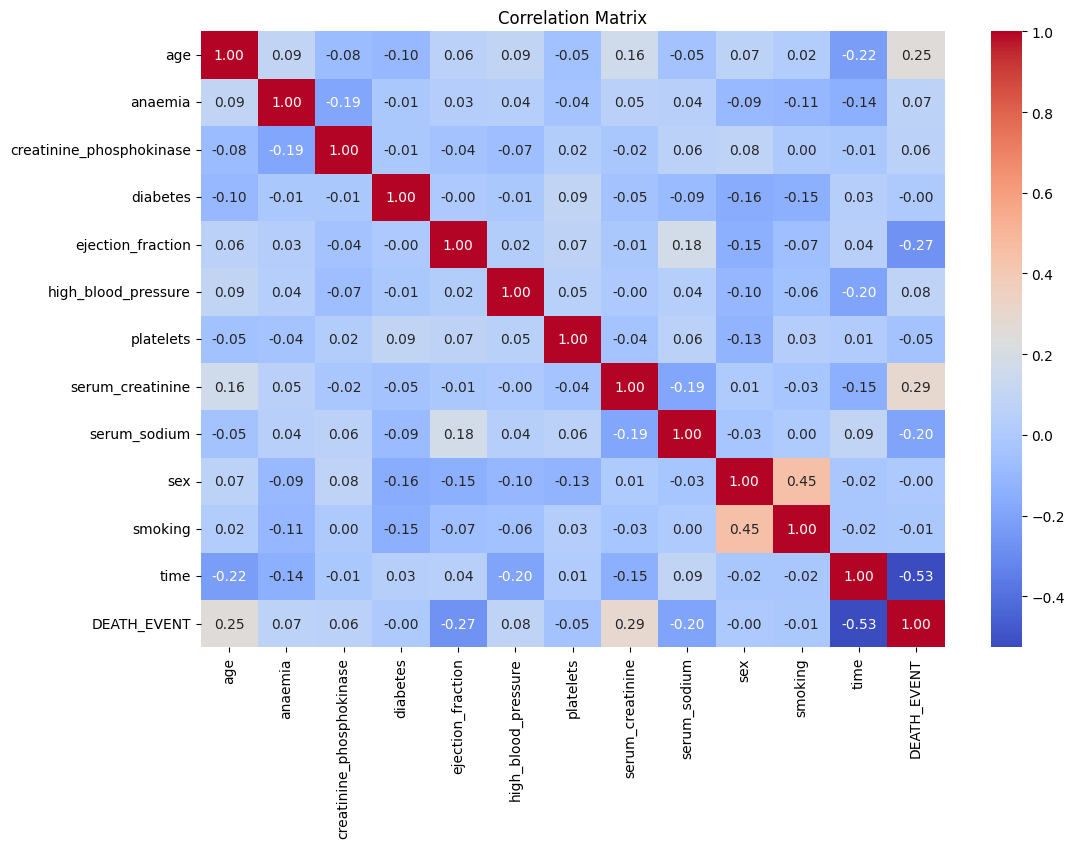

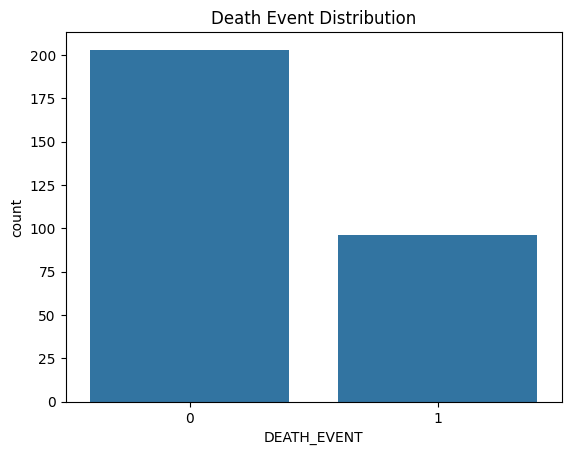

In [7]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Countplot for DEATH_EVENT
sns.countplot(x='DEATH_EVENT', data=data)
plt.title("Death Event Distribution")
plt.show()


spilt features of inputs and output

In [8]:
# Features (all except DEATH_EVENT)
X = data.drop('DEATH_EVENT', axis=1)

# Target
y = data['DEATH_EVENT']

print("Features shape:", X.shape)
print("Target class:", y.unique())


Features shape: (299, 12)
Target class: [1 0]


encoding

In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)


Classes: [0 1]


test-trsin spilting

In [10]:
# Split to train/test: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (239, 12)
Test shape: (60, 12)


scale the features

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


develop a model

In [106]:
model = Sequential([
    Dense(28, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),


    #when apply this reduce the accuracy upto 0.75
    #Dense(64, activation='relu'),
    #Dropout(0.3),
    #dense 32->give 0.80


    Dense(len(np.unique(y_encoded)), activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 28)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 2)              │            58 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 422 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4683 - loss: 0.8617 - val_accuracy: 0.4500 - val_loss: 0.8179
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4595 - loss: 0.8628 - val_accuracy: 0.4667 - val_loss: 0.7668
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5456 - loss: 0.7204 - val_accuracy: 0.5000 - val_loss: 0.7226
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5402 - loss: 0.7425 - val_accuracy: 0.5333 - val_loss: 0.6838
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5895 - loss: 0.6803 - val_accuracy: 0.6000 - val_loss: 0.6510
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5708 - loss: 0.7116 - val_accuracy: 0.6333 - val_loss: 0.6218
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6324 - loss: 0.6362 - val_accuracy: 0.6667 - val_loss: 0.5964
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7370 - loss: 0.5699 - val_accuracy: 0.7000 - val_loss: 0.5736


plot accuracy

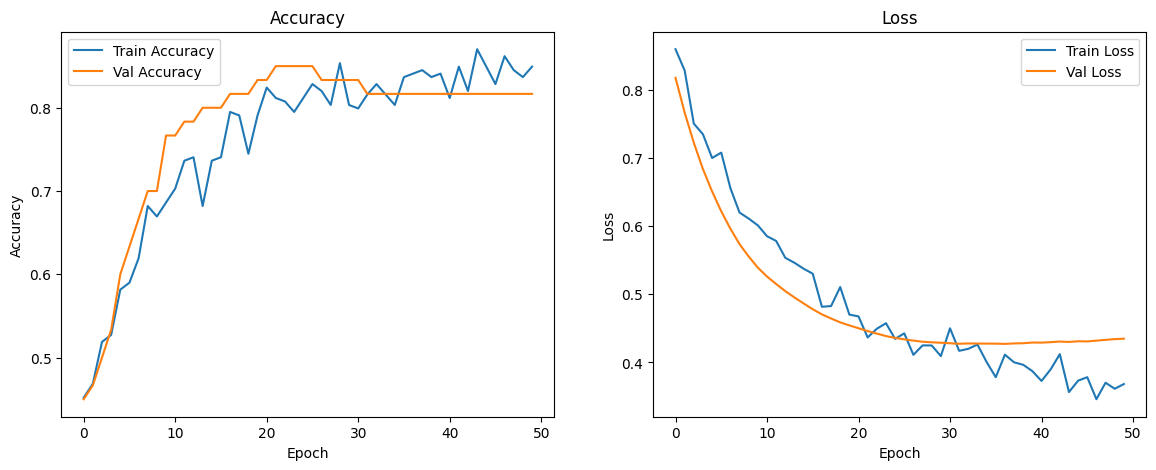

In [108]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [109]:
# Predict classes on test data
y_test_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to class index
y_test_pred_class_index = np.argmax(y_test_pred_probs, axis=1)

# Inverse transform
y_test_true = le.transform(y_test) if hasattr(le, 'transform') else y_test

# accuracy
accuracy = accuracy_score(y_test_true, y_test_pred_class_index)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred_class_index))
print(f"Test RMSE: {rmse:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Test Accuracy: 0.8167
Test RMSE: 0.4282


In [116]:
user_input = np.array([[75, 0, 583, 0, 20, 1, 206500, 1.9, 130, 1, 0, 4]])   #check the accuracy using the first row of the dataset

# Scale with same scaler
user_input_scaled = scaler.transform(user_input)

# Predict
pred_probs = model.predict(user_input_scaled)
print("Class probabilities:", pred_probs)

# predicted class index
pred_class_index = np.argmax(pred_probs, axis=1)
print("Predicted class index:", pred_class_index[0])

# Decode back to label
pred_class_name = le.inverse_transform(pred_class_index)[0]
print("Predicted class name (from LabelEncoder):", pred_class_name)

# Final output
if pred_class_name == 1:
    print("\nResult: Heart Failure Detected (1)\n")
else:
    print("\nResult: No Heart Failure (0)\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Class probabilities: [[0.0200644 0.9799355]]
Predicted class index: 1
Predicted class name (from LabelEncoder): 1

Result: Heart Failure Detected (1)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
# Save model
model.save("heart_failure_nn_model.h5")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

import gzip
import pickle

with gzip.open('model2.pkl', 'wb') as f:
    pickle.dump(model, f)


